In [4]:
import pandas as pd
import numpy as np
get_ipython().magic('matplotlib inline')
import os
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_rows', None) #To display all rows
pd.set_option('display.max_columns', None) # To display all columns
from datetime import date
from datetime import  time
import seaborn as sns

In [5]:
cf=pd.read_csv("C:/Users/Rushabh/Downloads/Data science software/Python projects/Credit card fraud/creditcard.csv")

In [6]:
cf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
cf.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Data visulizaation 

Distribuition of Normal(0) and Frauds(1): 
0    284315
1       492
Name: Class, dtype: int64


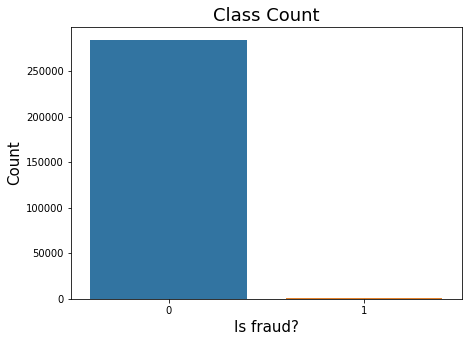

In [8]:
#By using this graph we can see the clear data imbalance.With help of this we can decide our further 
#action and the implementation of the algorithm.
print("Distribuition of Normal(0) and Frauds(1): ")
print(cf["Class"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(cf['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()



In [9]:
timedelta = pd.to_timedelta(cf['Time'], unit='s')
cf['Time_min'] = (timedelta.dt.components.minutes).astype(int)
cf['Time_hour'] = (timedelta.dt.components.hours).astype(int)

In [10]:
cf.tail(200)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
284607,172595.0,-0.128780,1.290989,-0.584634,-0.424729,1.068268,-0.951651,1.119394,-0.289588,-0.040139,-0.740770,-1.125065,-0.415136,0.289696,-0.926364,0.710219,0.148492,0.186509,0.908625,0.143920,0.060849,0.258380,0.978741,-0.346699,-0.708009,-0.335079,-0.116525,0.344570,0.294544,4.39,0,56,23
284608,172599.0,-0.195044,1.238305,-0.768720,-0.178302,0.582600,-1.282570,0.946855,-0.129767,-0.040571,-0.915827,-0.700535,-0.463585,-0.424763,-0.708648,0.713934,0.029515,0.617882,0.766489,-0.185751,-0.205106,0.365673,1.207021,-0.111128,-0.162594,-0.896012,-0.259841,-0.131265,-0.005010,18.16,0,56,23
284609,172599.0,2.035871,-0.069877,-1.168968,0.208965,0.162972,-0.601478,0.101776,-0.176646,0.207296,0.216017,0.821904,1.374712,0.664454,0.332064,-0.658457,0.098694,-0.637984,-0.433686,0.483594,-0.170328,-0.246570,-0.571288,0.287104,-0.378273,-0.278012,0.201952,-0.067508,-0.072807,0.89,0,56,23
284610,172602.0,-3.849825,3.978385,-5.138427,-0.756156,-1.496193,-1.344611,-1.733808,3.273432,-0.870490,-1.153584,-2.710705,1.219892,0.571736,3.174297,0.089713,0.229366,0.937491,0.329164,0.563197,-0.807312,0.601646,0.576961,0.213363,0.046459,0.381029,-0.417428,-1.409201,-0.350954,11.76,0,56,23
284611,172604.0,-0.853878,0.781617,1.379211,-0.846809,0.073660,0.074457,0.224597,0.069018,0.286244,-0.136453,0.423967,1.091459,1.034918,-0.516513,-0.819918,0.469357,-1.000403,0.597069,0.046919,0.042907,0.280279,0.962593,-0.298727,-0.248777,-0.321043,0.510994,-0.029603,0.222621,10.00,0,56,23
284612,172605.0,-1.478137,1.192969,0.929363,-1.010237,-0.279410,0.089500,-0.154260,0.812227,-0.201488,-0.575470,0.662147,1.246784,0.743261,0.162684,-0.613579,0.730201,-0.663507,0.191455,0.090021,-0.049266,-0.087187,-0.346096,0.026694,0.777842,-0.403000,0.190670,-0.357377,-0.186800,12.00,0,56,23
284613,172605.0,-0.054804,0.539229,-0.785936,-1.359666,0.052568,-1.269691,0.591211,0.123632,-1.867227,0.259018,0.216923,0.006207,-0.911740,1.009965,-1.574886,-1.794610,0.073230,1.285897,-0.539764,-0.771646,-0.103069,0.099001,-0.158142,0.093863,-0.064144,0.734388,-0.156006,-0.059705,2.00,0,56,23
284614,172605.0,2.194358,-0.623494,-1.729118,-0.885661,-0.029938,-0.366695,-0.600194,-0.150353,-0.237877,0.221241,-0.888752,-0.618055,0.839641,-1.689803,0.186091,1.484546,0.931517,-0.832449,0.624335,0.116436,0.078072,0.261817,0.090361,-0.042758,-0.005371,-0.186887,0.002090,-0.022876,30.00,0,56,23
284615,172605.0,1.831882,-0.978864,-1.764574,-1.895336,-0.515448,-1.763626,0.395318,-0.461927,2.031610,-1.293648,-0.478295,0.689792,-0.546261,0.688258,1.429600,-1.111129,-0.044988,-0.365219,1.095446,0.047280,-0.130003,-0.514438,0.111976,-0.113005,-0.051552,-1.111532,-0.000730,-0.024640,157.61,0,56,23
284616,172605.0,1.842770,-0.249589,-1.746730,0.982280,0.620243,-0.076408,0.318538,-0.152881,0.031831,0.444589,-0.021077,0.560408,0.215435,0.652211,-0.041717,0.429694,-1.211304,0.771076,-0.022614,-0.000003,0.311143,0.763634,-0.245941,-1.142100,0.381243,-0.385377,-0.019911,-0.053905,114.90,0,56,23


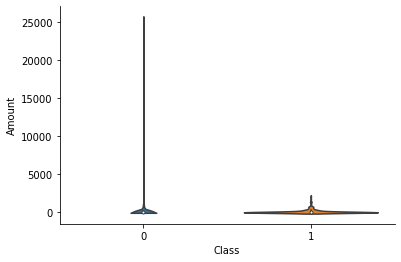

In [11]:
sns.violinplot(cf['Class'], cf['Amount']) #Variable Plot
sns.despine()

In [12]:
#We can see the std distribution and the outliers in the data.

def plot_comparison(x, title):
    fig, ax = plt.subplots(3, 1, sharex=True)
    sns.distplot(x, ax=ax[0])
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1])
    print()
    ax[1].set_title('Boxplot')
    print()
    sns.violinplot(x, ax=ax[2])
    print()
    ax[2].set_title('Violin plot')
    print("\n")
    fig.suptitle(title, fontsize=16)
    print()
    

In [13]:
plt.show()

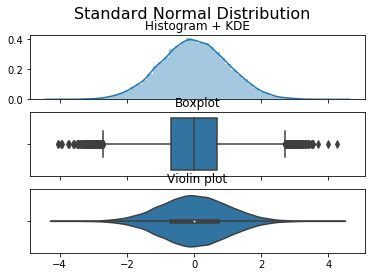

In [14]:
sample_gaussian = np.random.normal(size=50000)
plot_comparison(sample_gaussian, 'Standard Normal Distribution')

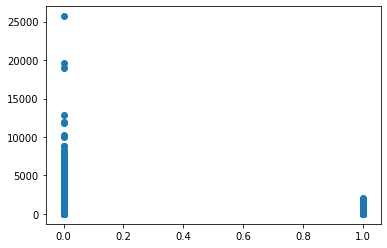

In [15]:

    plt.scatter(cf['Class'], cf['Amount'])

In [16]:
cf['Amount'].max()

25691.16

(array([2.83794e+05, 8.09000e+02, 1.52000e+02, 2.70000e+01, 1.50000e+01,
        4.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0.   ,  1712.744,  3425.488,  5138.232,  6850.976,  8563.72 ,
        10276.464, 11989.208, 13701.952, 15414.696, 17127.44 , 18840.184,
        20552.928, 22265.672, 23978.416, 25691.16 ]),
 <a list of 15 Patch objects>)

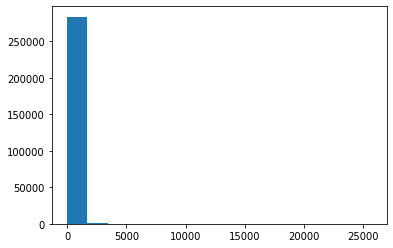

In [17]:
plt.hist(cf['Amount'], bins=15)

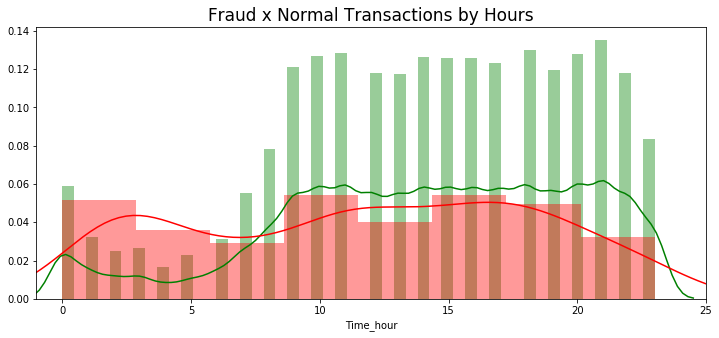

In [18]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(cf[cf['Class'] == 0]["Time_hour"], 
             color='g')
sns.distplot(cf[cf['Class'] == 1]["Time_hour"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

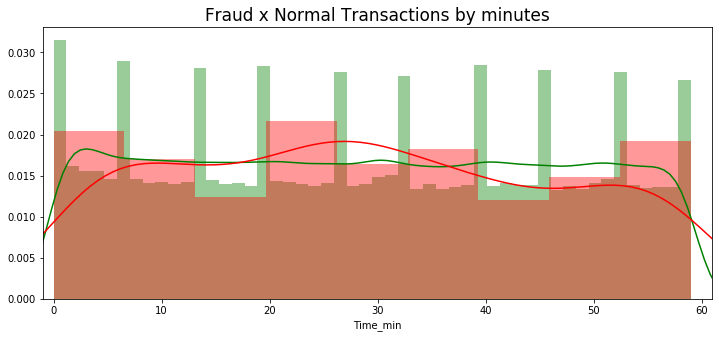

In [19]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(cf[cf['Class'] == 0]["Time_min"], 
             color='g')
sns.distplot(cf[cf['Class'] == 1]["Time_min"], 
             color='r')
plt.title('Fraud x Normal Transactions by minutes', fontsize=17)
plt.xlim([-1,61])
plt.show()

In [20]:
#To clearly the data of frauds and no frauds
df_fraud = cf[cf['Class'] == 1]
df_normal = cf[cf['Class'] == 0]

print("Fraud transaction statistics")
print(cf["Amount"].describe())
print("\nNormal transaction statistics")
print(cf["Amount"].describe())

Fraud transaction statistics
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Normal transaction statistics
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [21]:
cf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0


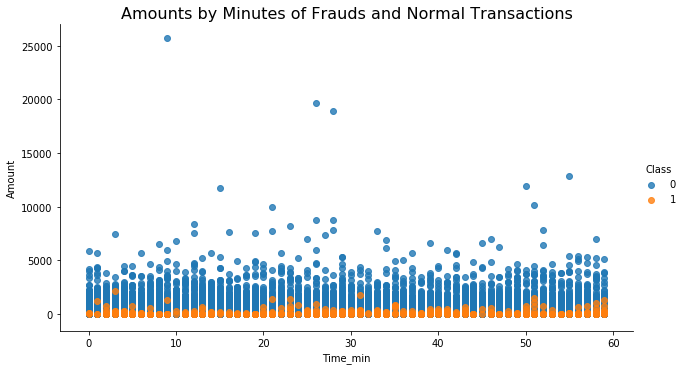

In [22]:
#Looking the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=cf, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
#plt.show()

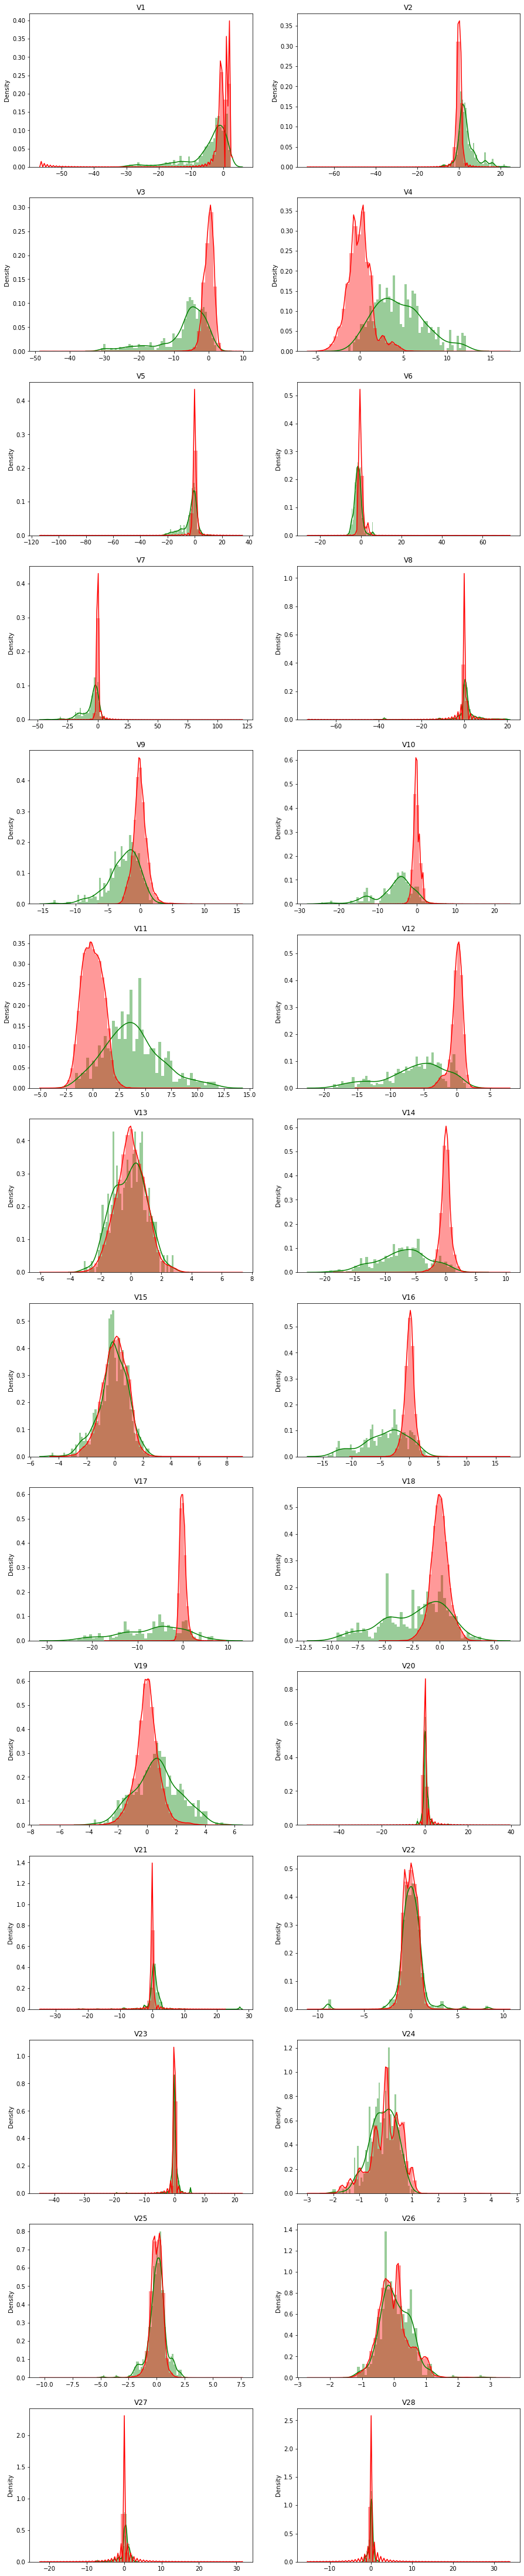

In [23]:
#In the below diagram we can see the data distribution of each and every feature and we can decide 
# and find out the fraudulant data nature.It also helps you to decide the signifricant features.

import matplotlib.gridspec as gridspec
#Looking the V's features
columns = cf.iloc[:,1:29].columns

frauds = cf.Class == 1
normals = cf.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(cf[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(cf[col][frauds], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(cf[col][normals], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [24]:
cf = cf[["Time_hour","Time_min","V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount","Class"]]

In [25]:

cf.Amount = np.log(cf.Amount + 0.001)

In [26]:
cf.head()

,Time_hour,Time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.133558,5.008105,0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,0.989913,0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,5.936641,0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.062723,4.816249,0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.219422,4.248367,0


In [ ]:
# Here we are distributing the data and implementing the different algorithm.Also we are checking for the accuracy and ROC curve where we will be able to decide the which is good and giving the right accuracy.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

Using TensorFlow backend.


In [28]:
x=cf.iloc[:,0:16]
y=cf.iloc[:,-1]

In [29]:
x_train1,x_test,y_train1,y_test=train_test_split(x,y,test_size=.3,random_state=100)

In [30]:
x_train,y_train= SMOTE().fit_sample(x_train1,y_train1)

In [31]:
#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
x_smote,y_smote = SMOTE().fit_sample(x,y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 284315, 1: 492})
SMOTE data distribution: Counter({0: 284315, 1: 284315})


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

# Random forest algorithm

In [54]:

classifier=RandomForestClassifier(n_estimators=80)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
pred=classifier.predict(x_test)
print("Your prediction is:", pred)

Your prediction is: [0 0 0 ... 0 0 0]


In [56]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(pred,y_test)
tab1

array([[85278,    27],
       [   23,   115]], dtype=int64)

In [58]:
tab1.diagonal().sum() / tab1.sum() *100

99.94148145547324

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = classifier.predict_proba(x_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# Logistic regression

In [31]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
log_pred=logistic.predict(x_test)

C:\Users\Rushabh\Anaconda3New\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
print("Logistic prediction is:",log_pred)

Logistic prediction is: [0 0 0 ... 0 0 0]


In [36]:
tab2=confusion_matrix(log_pred,y_test)
print("logistic confusion matrix is:")
tab2

logistic confusion matrix is:


array([[83357,    22],
       [ 1944,   120]], dtype=int64)

In [35]:
tab2.diagonal().sum() / tab2.sum() *100

97.69905082920778

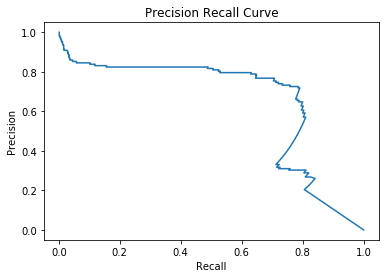

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logistic.predict_proba(x_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier


In [35]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree_pred=tree.predict(x_test)
print("Prediction of Decision tree is:")
tree_pred

Prediction of Decision tree is:


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix
tab3= confusion_matrix(tree_pred,y_test)
tab3.diagonal().sum() / tab3.sum() *100

99.76943693456455

In [39]:
print("Accuracy of Decision tree is:")
tab3

Accuracy of Decision tree is:


array([[85137,    33],
       [  164,   109]], dtype=int64)

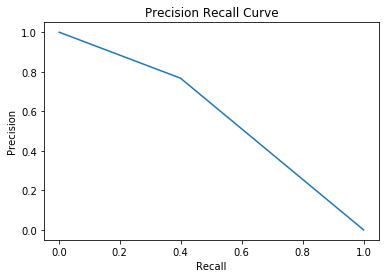

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = tree.predict_proba(x_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [45]:
#Adaboosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.01, 0.1, 1, 10],
             'penalty':['l1', 'l2']}

#LogisticRegression(random_state=2)



In [46]:

#grid=GridSearchCV(RandomForestClassifier(max_features=3, max_depth=2,n_estimators=10,criterion='entropy', n_jobs=1, verbose=1),param_grid=param_grid,scoring="recall")
#adaboosting=AdaBoostClassifier(LogisticRegression(),n_estimators=200)
#grid=GridSearchCV(LogisticRegression(random_state=2),param_grid =param_grid,scoring="recall")
adaboosting=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=200)
adaboosting.fit(x_train,y_train)
Ada_pred= adaboosting.predict(x_test)

In [47]:
Ada_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix
tab2 = confusion_matrix(Ada_pred,y_test)
tab2

array([[85129,    34],
       [  172,   108]], dtype=int64)

In [49]:
tab2.diagonal().sum() / tab2.sum() *100

99.75890359654974

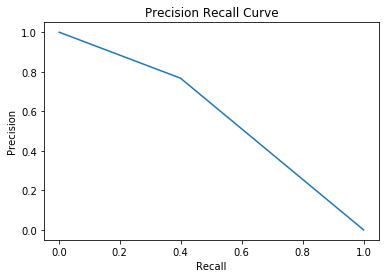

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = tree.predict_proba(x_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [52]:
from sklearn.metrics import classification_report
print(classification_report(Ada_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85163
           1       0.76      0.39      0.51       280

    accuracy                           1.00     85443
   macro avg       0.88      0.69      0.76     85443
weighted avg       1.00      1.00      1.00     85443



In [61]:
x_train.shape

(398028, 16)

In [62]:
y_train.shape

(398028,)

In [65]:
y_test.shape

(85443,)

In [66]:
x_test.shape

(85443, 16)

# Conclusion:

 After applying the different algorithms and checking the acuracy we got to know tha random forest algorithm
plays  a greate job.By using the Adaboosting and GridSearch CV algorithm we were able to see some auuracy.